# Task 2:

The following code can be used in python to determine the machine accuracy ε (or Machine epsilon):

```
import numpy as np
numprec=1.0
while 1<np.float32(1+numprec): # Check sum with single precision
# while 1<1+numprec: # Check sum with double precision
numprec*=0.5
numprec*=2
```

1. Determine ε using the above code, both for single and double precision. A double precision number
uses 8 bytes of storage, whereas a single precision number only occupies 4 bytes.
2. Give a definition of the machine accuracy based on the code above (use words and not mathematical
expression)

In [1]:
import numpy as np

# Divide 1 by 2 repeatedly until it is equivalent to 0 according to 32 bit floating point values
numprec_single = 1.0
while 1<np.float32(1+numprec_single): #single
    numprec_single*=0.5
numprec_single*=2
print(f'Machine epsilon (Single, 4 bytes):{numprec_single}')

# Divide 1 by 2 repeatedly until it is equivalent to 0 according to a double floating point value
numprec_double = 1.0
#while 1<np.float32(1+numprec): #single
while 1<1+numprec_double: #double
    numprec_double*=0.5
numprec_double*=2
print(f'Machine epsilon (Double, 8 bytes):{numprec_double}')

Machine epsilon (Single, 4 bytes):1.1920928955078125e-07
Machine epsilon (Double, 8 bytes):2.220446049250313e-16


# Task 3

### Given:

Approximation of a derivative given by the centered difference scheme:
$$f'_n(x) = \frac{f(x+\Delta x) - f(x - \Delta x)}{2\Delta x}$$

The estimate of the relative discretization error:
$$\epsilon _d = |\frac{f'(x) - f'_n(x)}{f'(x)}|$$

Let $x = 2$, $\Delta x = 10^{-20} \cdots 10^0$ 

### Find:

Use the centered difference scheme to compute the relative discretization error of the function:
$$f(x) = \frac{1}{2+x} + x^2$$

Plot $\epsilon _d$ vs. $\Delta x$ on a log-log plot


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.36961445 0.18770148 0.0054518
 0.09305919 0.07874333 0.01457127 0.03300319 0.02831651 0.02360712
 0.02270742 0.02519165 0.02122293 0.01980186 0.02369633 0.02270896
 0.02291075 0.02304884 0.02285876 0.02327812 0.02331843 0.02326029
 0.02325196 0.02323477 0.02325287 0.02327266 0.0232516  0.02325723
 0.02325336 0.02325711 0.02325632 0.02325623 0.02325581 0.02325581
 0.02325575 0.02325588 0.0232558  0.02325585 0.0232558  0.02325582
 0.02325581 0.02325581 0.02325582 0.02325581 0.02325581 0.02325581
 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581
 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581
 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581 0.02325581
 0.02325581 0.02325582 0.02325582 0.02325583 0.02325585 0.0232559
 0.02325604 0.0232563

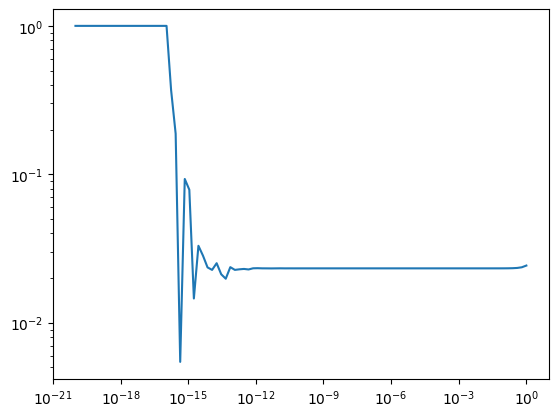

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

exponents = np.linspace(-20, 0, 100)
delta_x = [np.float64(10**n) for n in exponents]

# Define the function
def f(x):
    return 1/(2+x) + x**2

# Define the function for array parameters
def f_array(x):
    return [f(x_n) for x_n in x]

# Analytic derivative for f(x)
def dfdt(x):
    return 1/2/(2+x)**2 + 2*x

# Analytic derivative defined for arrays
def dfdt_array(x):
    return [dfdt(x_n) for x_n in x]

# Numeric centered difference scheme
def dfdt_n(x, delta_x):
    return ( f(x+delta_x) - f(x-delta_x) ) / (2 * delta_x)

# Numeric derivative for single value of x and array of delta_x values
def dfdt_n_array(x, delta_x):
    return [dfdt_n(x, delta_x_n) for delta_x_n in delta_x]

# Relative discretion error
e_d = np.abs( ( np.ones(len(delta_x))*dfdt(2.0) - dfdt_n_array(2.0, delta_x) ) / dfdt(2.0) )
print(e_d)

plt.loglog(delta_x, e_d)